In [ ]:
#This program predicts if the price of a house will be above the median proce or not by using deep learning
# Following youtube lesson https://www.youtube.com/watch?v=vSzou5zRwNQ
# Dataste is here on Kaggle:  https://www.kaggle.com/alphaepsilon/housing-prices-dataset

from keras.models import Sequential #Initialize Artif. neural Network
from keras.layers import Dense #Tell us the number of layers, neurons per layer and activations function

from sklearn.model_selection import train_test_split # To split the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler # To scale the data

import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload() #upload the data

df = pd.read_csv('housepricedata.csv') #load the data
# This is another dataset df = pd.read_csv('house_prices_train.csv') #load the data
df.head(10) # print the first 10 rows of data

In [4]:
# Convert the data into an array
dataset=df.values 
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
# split the data set into independent and dependent data sets
X = dataset[:, 0:10]# Get all the rows from columns [0, 10)
Y = dataset[:, 10]# Get all the rows from 10th column



In [ ]:
# use the min-max scaler method from preprocessing which scales the dataset
# so that all features lie in [0,1]

min_max_scaler =MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
X_scale


In [50]:
#Split the data into 80% training and 10% testing and 10% validation

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# The X variable has 10 inout features
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [47]:
# Build the model and architecture of the deep neural network

model = Sequential() # initialization the ANN
model.add(Dense(units=32, activation = 'relu', input_dim=10))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))





In [48]:
# Loss function measures how well the model did on training, and
# then tried too improveon it using the optimizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

In [40]:
# Print the accuracy
model.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8767


0.8767123222351074

In [42]:
#Make a prediction
prediction = model.predict(X_test)
prediction = [1 if y>=0.87 else 0 for y in prediction]
print(prediction)
print(Y_test)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0]


In [ ]:
#Visualization the trining loss and validation loss to see if the model is overfitting

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Trainn', 'Val'], loc='upper right')



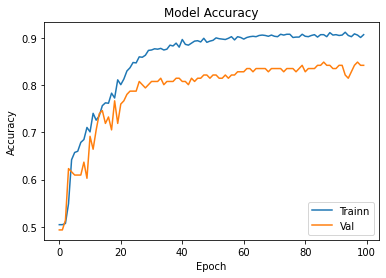

In [44]:
#Visualization the trining accuracy and the validation accuracy to see if the model is overfitting

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Trainn', 'Val'], loc='lower right')
